#### Dataset Used: Iris dataset in sklearn.datasets
#### Name: Rajath C Aralikatti
#### Roll No: 181CO241 Section 2

## KNN
- The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

## Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

## Dataset Info

In [3]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
x = np.array(iris['data'])
y = np.array(iris['target'])
feat_names = iris['feature_names']

print('Input features shape is', x.shape, 'and type is', x.dtype)
print('Output shape is', y.shape, 'and type is', y.dtype)

print('\nList of Features is:')
for i in feat_names:
  print(i)

Input features shape is (150, 4) and type is float64
Output shape is (150,) and type is int64

List of Features is:
sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)


## Splitting data between Train and Test sets

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0, stratify=y)

In [6]:
print('Dimensions and datatype of')

print('x_train:', x_train.shape, '\tdtype:', x_train.dtype, '\tRange:', x_train.min(), 'to', x_train.max())
print('y_train:', y_train.shape, '\tdtype:', y_train.dtype, '\tRange:', y_train.min(), 'to', y_train.max())

print('x_test:', x_test.shape, '\tdtype:', x_test.dtype, '\tRange:', x_test.min(), 'to', x_train.max())
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype, '\tRange:', y_test.min(), 'to', y_test.max())

Dimensions and datatype of
x_train: (105, 4) 	dtype: float64 	Range: 0.1 to 7.9
y_train: (105,) 	dtype: int64 	Range: 0 to 2
x_test: (45, 4) 	dtype: float64 	Range: 0.1 to 7.9
y_test: (45,) 		dtype: int64 	Range: 0 to 2


## Normalize the data

In [7]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

In [8]:
print(mean, std)

[5.86380952 3.04190476 3.75714286 1.20095238] [0.85725184 0.45288093 1.7976099  0.76201428]


In [9]:
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [10]:
print('Dimensions and datatype of')

print('x_train:', x_train.shape, '\tdtype:', x_train.dtype, '\tRange:', x_train.min(), 'to', x_train.max())
print('y_train:', y_train.shape, '\tdtype:', y_train.dtype, '\tRange:', y_train.min(), 'to', y_train.max())

print('x_test:', x_test.shape, '\tdtype:', x_test.dtype, '\tRange:', x_test.min(), 'to', x_train.max())
print('y_test:', y_test.shape, '\t\tdtype:', y_test.dtype, '\tRange:', y_test.min(), 'to', y_test.max())

Dimensions and datatype of
x_train: (105, 4) 	dtype: float64 	Range: -2.300615239971733 to 2.9987909800728434
y_train: (105,) 	dtype: int64 	Range: 0 to 2
x_test: (45, 4) 	dtype: float64 	Range: -1.8589980549680178 to 2.9987909800728434
y_test: (45,) 		dtype: int64 	Range: 0 to 2


##  Using Scikit Learn Inbuilt KNN Classifier

In [11]:
from sklearn.neighbors import KNeighborsClassifier

def knn_fun(k=3):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  pred = knn.predict(x_test)
  return(accuracy_score(y_test, pred), pred)

In [12]:
# Running KNN for k = 1 to 15 and choosing the best k value

best_pred = []
best_acc = float('-inf')
best_k = -1

k_list = []
acc_list = []

for i in range(1, 16):
  acc, pred = knn_fun(i)
  k_list.append(i)
  acc_list.append(acc)
  if(acc > best_acc):
    best_acc = acc
    best_k = i
    best_pred = pred

Text(0.5, 1.0, 'K value (x-axis) vs Testing Accuracy (y-axis)')

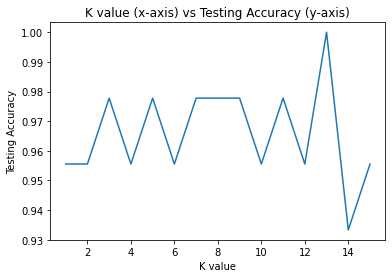

In [13]:
plt.plot(k_list, acc_list)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')
plt.title('K value (x-axis) vs Testing Accuracy (y-axis)')

In [14]:
print('K Value with best accuracy', best_k)
print('Note: If multiple K values give the same accuracy, the lowest such K is printed\n')
print('Ground Truth')
print(y_test, '\n')
print('Best Prediction')
print(best_pred, '\n')

K Value with best accuracy 13
Note: If multiple K values give the same accuracy, the lowest such K is printed

Ground Truth
[2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2] 

Best Prediction
[2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2] 



In [15]:
print(classification_report(y_test, pred))
print('Accuracy is', best_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy is 1.0


## KNN without Scikit Learn

In [16]:
# KNN - Metric is Euclidian distance
from scipy import stats

def knn_fun(k=3):
  pred = []
  for x in x_test:
    dist = np.sum((x - x_train)**2, axis=1)
    sorted_dist = np.argsort(dist)
    neighbor_classes = []
    for i in range(k):
      neighbor_classes.append(y_train[sorted_dist[i]])
    pred.append(stats.mode(neighbor_classes)[0][0])
        
  return(accuracy_score(y_test, pred), pred)

In [17]:
# Running KNN for k = 1 to 15 and choosing the best k value

best_pred = []
best_acc = float('-inf')
best_k = -1

k_list = []
acc_list = []

for i in range(1, 16):
  acc, pred = knn_fun(i)
  k_list.append(i)
  acc_list.append(acc)
  if(acc > best_acc):
    best_acc = acc
    best_k = i
    best_pred = pred

Text(0.5, 1.0, 'K value (x-axis) vs Testing Accuracy (y-axis)')

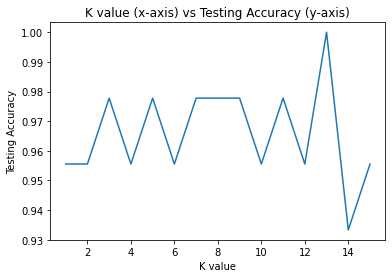

In [18]:
plt.plot(k_list, acc_list)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')
plt.title('K value (x-axis) vs Testing Accuracy (y-axis)')

In [19]:
print('K Value with best accuracy', best_k)
print('Note: If multiple K values give the same accuracy, the lowest such K is printed\n')
print('Ground Truth')
print(y_test, '\n')
print('Best Prediction')
print(np.array(best_pred), '\n')

K Value with best accuracy 13
Note: If multiple K values give the same accuracy, the lowest such K is printed

Ground Truth
[2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2] 

Best Prediction
[2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2] 



In [20]:
print(classification_report(y_test, pred))
print('Accuracy is', best_acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      1.00      0.94        15
           2       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Accuracy is 1.0
